# Failed 2D equalization analysis

## Analysis table

The results are all at a relatively separated configuration, with $t\sim 130$ Hz.

|  |  | 3x3 rectangular Lieb | 3x3 rectangle | 8x1 chain |
| :--- | :--- | :--- | :--- | :--- |
| no waist | UT | 0.00018064760147118452 | 0.18404804538643157 converged? | 1.0603627956606677e-11 |
| | Uv | 0.02691153037943334 | 0.16059888200983538 | 1.1146955607142834e-10 |
| | UvT | 0.110709078676327 | 0.36887983642652517 | 0.18686144424543943 |
| | vT | 7.119043746536637e-07 | 1.1611198914732558e-05 | 7.490303328706952e-13 |
| xy waist | UT | 6.640516197055468e-07 | 0.16202393556778452 | 3.30976e-12 |
| (x waist for 1D chain)| Uv | 2.696316370356098e-06 | 2.181539567988712e-06 | 1.192389e-11 |
| | UvT | 1.247077784256648e-06 | 0.050791328202319075 | 8.4648e-13 |
| | vT | 2.325228101079903e-06 | 2.153054071686239e-06 | 1.26126e-11 |

NM redo: 

* 3x3 Lieb None UT
* 3x3 Lieb None Uv
* 3x3 rectangle None UT
* 3x3 rectangle None Uv
* 3x3 rectangle xy UT


## 3x3 Lieb square

### 3x3 Lieb no waist UT

3x3 Lieb is a special case, as its t is always equal fixing t might cause a conter effect to equalization.

Lieb lattice size adjust to: [3 3]
Equalize: scale_factor is not a number. Set to None.


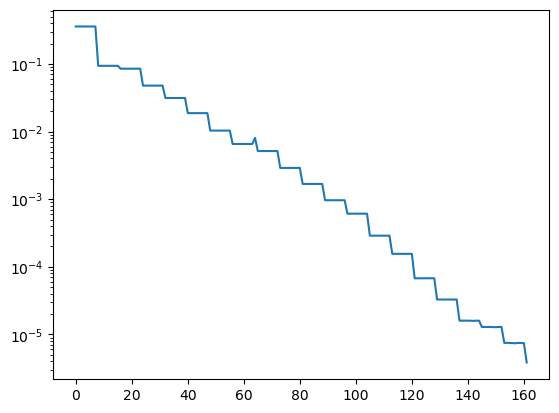

In [2]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'Lieb'
w = None
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1550),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")


plt.plot(c, '-')
plt.yscale('log')


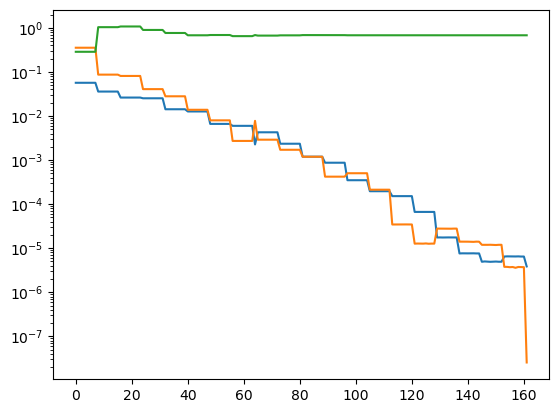

In [3]:
ct = rep.a(report, "Equalization_Log", "cost_func_by_terms")
plt.plot(ct, '-')
plt.yscale('log')


H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.82s.
H_solver: eigenstates memory usage:  1.23 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[ 1 -1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.66s.
H_solver: eigenstates memory usage:  1.19 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.81s.
H_solver: eigenstates memory usage:  1.19 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[-1 -1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.73s.
H_solver: eigenstates memory usage:  1.15 MiB.
Single band optimization time: 0.027883052825927734s.
Calcu

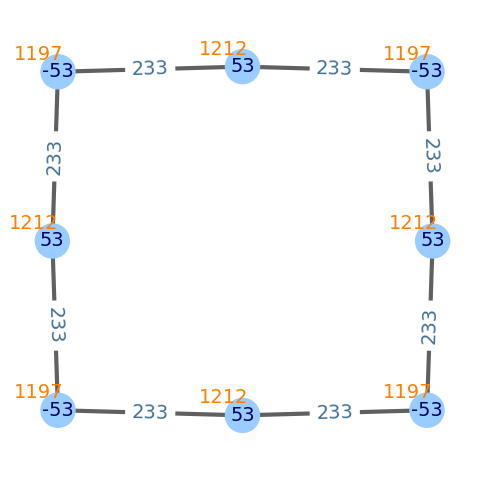

In [5]:
G.draw_graph()


In [4]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=1)
A, U, V = G.singleband_Hubbard(u=True, offset=True)
links = G.xylinks()
def func(x): return 0.8 * np.min(x)
txTarget, tyTarget = G.t_target(G.nn_tunneling(A), links, func)
G.sf = np.min(np.array([txTarget, tyTarget]))
Utarget = np.max(U)
print(txTarget, tyTarget, Utarget)



Equalize: 1-th equalization trap depths: [1.0002683  0.99999561 0.99999561]
Equalize: 1-th equalization trap centers:
[[-1. -1.]
 [-1.  0.]
 [ 0. -1.]]
lattice: Full lattice sizes updated to: [3 3 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4.55 7.2 ]w is set.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.82s.
H_solver: eigenstates memory usage:  1.23 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[ 1 -1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.76s.
H_solver: eigenstates memory usage:  1.19 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.00s.
H_solver: eigenstates memory usage:  1.19 MiB.


In [6]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=-1)
E, W, p = G.eigen_basis()
G.verbosity = 0
# G.singleband_Hubbard(u=True, offset=True)
E = E[0]
W = W[0]
p = p[0]
R = G.Xmat(W, p)

# In high dimension, X, Y, Z don't commute
# Convert list of ndarray to list of Tensor
solution = riemann_optimize(R)
V = site_order(G, solution, R)
print('detV =', la.det(V))



Equalize: -2-th equalization trap depths: [0.98157676 0.97664542 0.97642409]
Equalize: -2-th equalization trap centers:
[[-1.0272094  -1.02603843]
 [-0.97709336  0.        ]
 [ 0.         -1.01435925]]
lattice: Full lattice sizes updated to: [3 3 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4.55 7.2 ]w is set.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.80s.
H_solver: eigenstates memory usage:  1.23 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[ 1 -1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.71s.
H_solver: eigenstates memory usage:  1.19 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.80

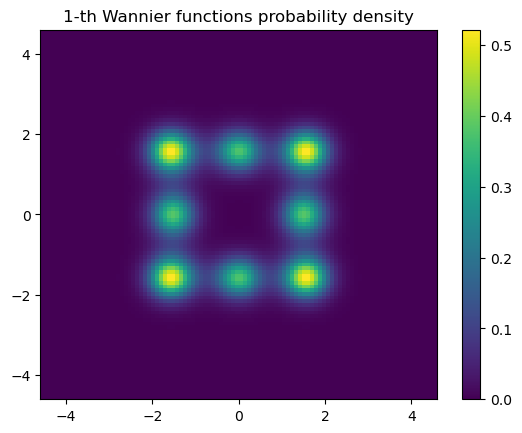

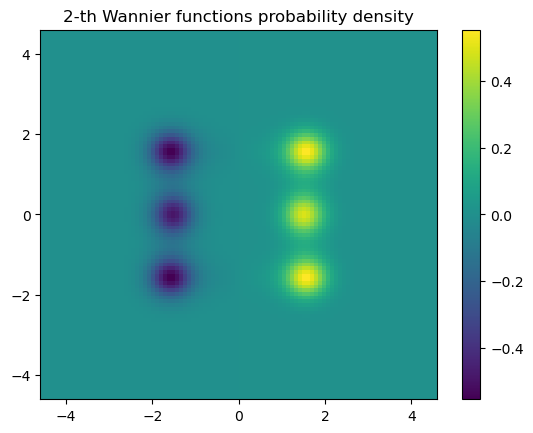

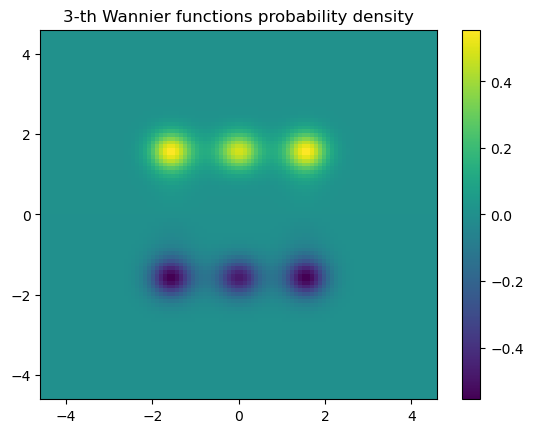

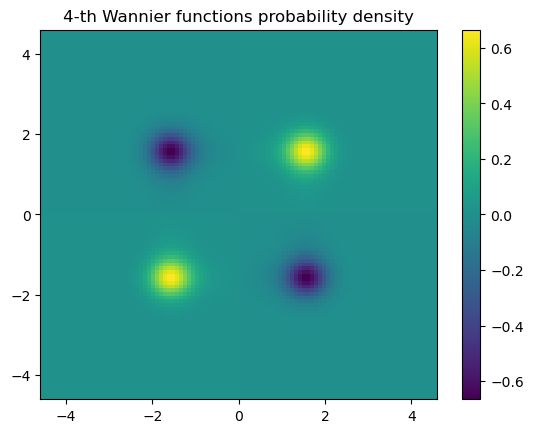

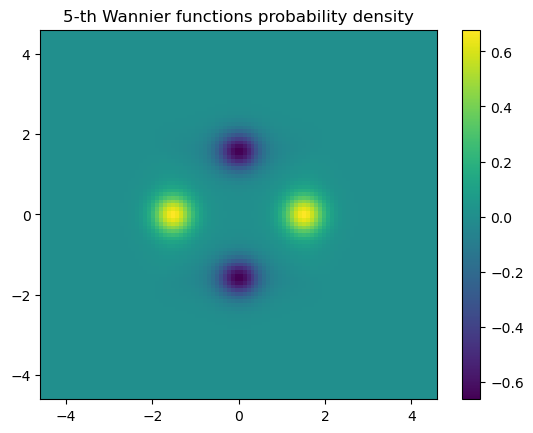

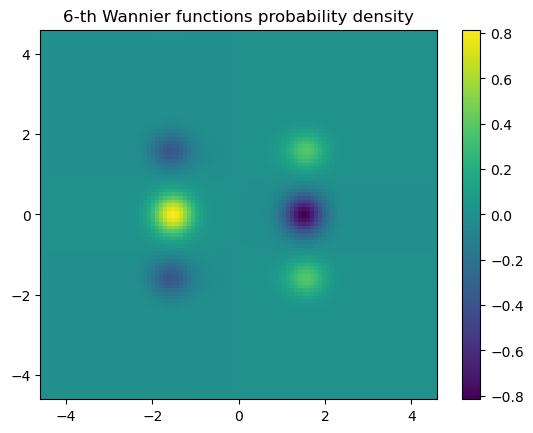

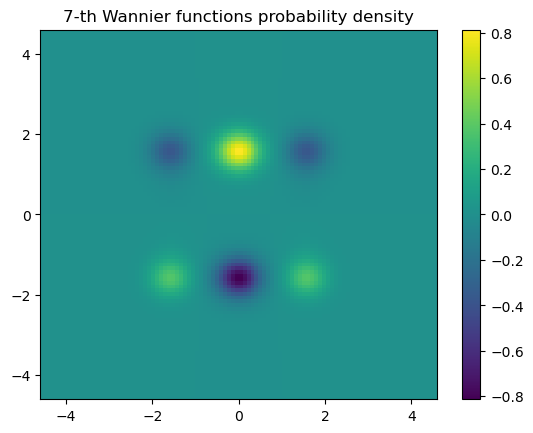

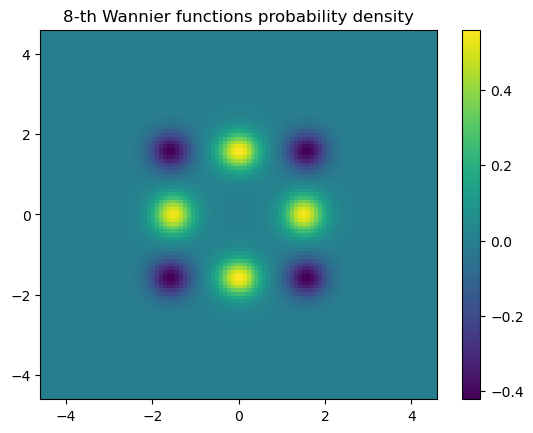

In [7]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-G.R0[0], G.R0[0], 100)
y = np.linspace(-G.R0[1], G.R0[1], 100)
z = np.array([0])
X = np.meshgrid(x, y, indexing='ij')

for i in range(G.Nsite):
    Wx = fix_phase(
        psi((x, y, z), G.n, G.dx, W[i], p[i])[..., 0, 0], mode='svmd')
    plt.figure()
    plt.pcolormesh(*X, Wx)
    plt.colorbar()
    plt.title(f'{i+1}-th Wannier functions probability density')


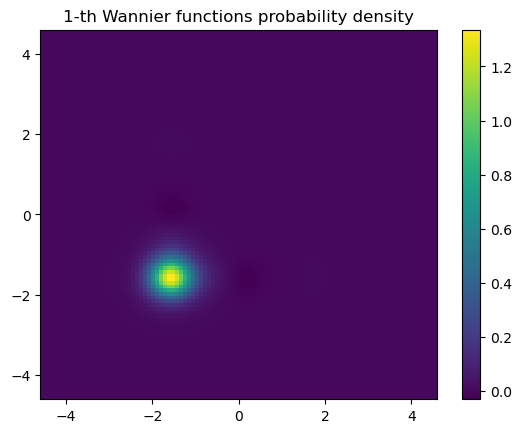

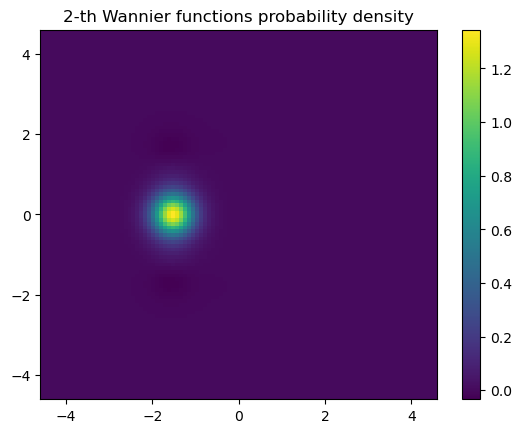

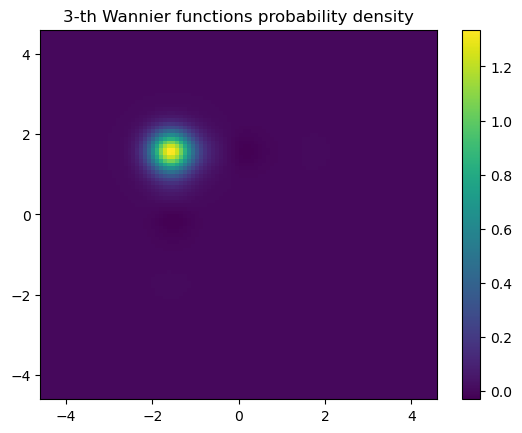

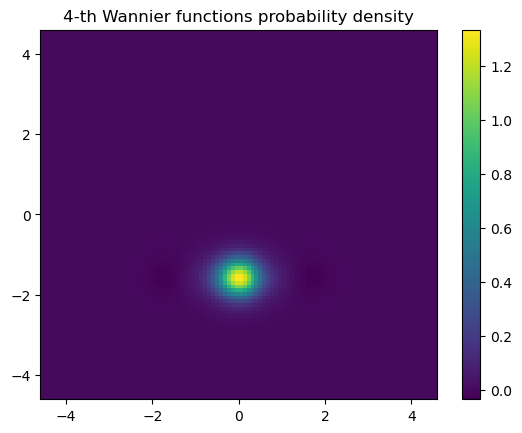

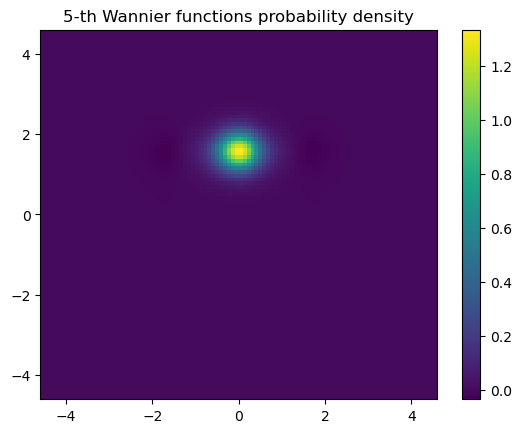

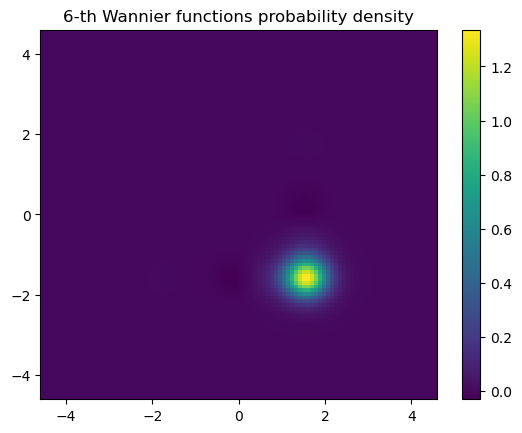

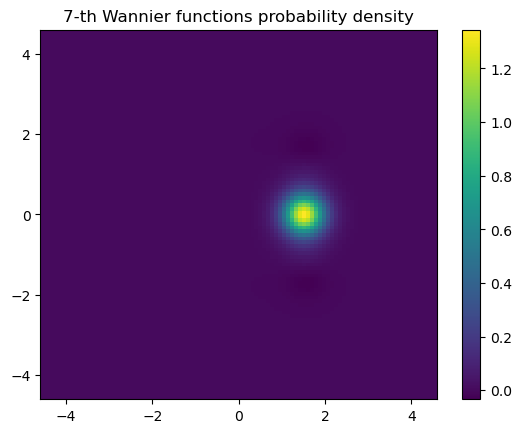

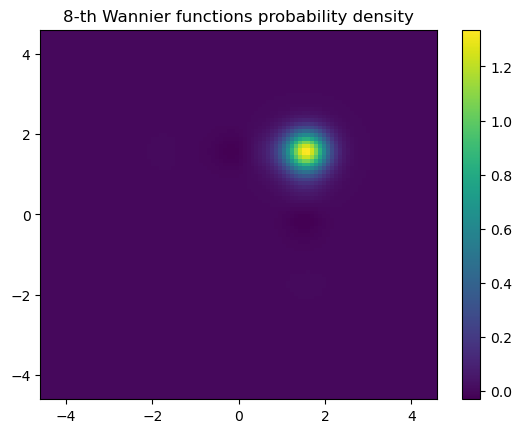

In [8]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-G.R0[0], G.R0[0], 100)
y = np.linspace(-G.R0[1], G.R0[1], 100)
z = np.array([0])
wx = wannier_func((x, y, z), V, G, W, p)
X = np.meshgrid(x, y, indexing='ij')

for i in range(G.Nsite):
    Wx = fix_phase(wx[..., 0, i], mode='svmd')
    plt.figure()
    plt.pcolormesh(*X, Wx)
    plt.colorbar()
    plt.title(f'{i+1}-th Wannier functions probability density')


### 3x3 Lieb xy UT

Lieb lattice size adjust to: [3 3]
Equalize: scale_factor is not a number. Set to None.


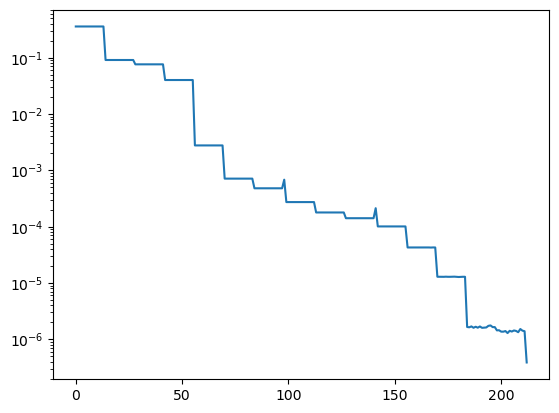

In [16]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'Lieb'
w = 'xy'
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1550),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")


plt.plot(c, '-')
plt.yscale('log')


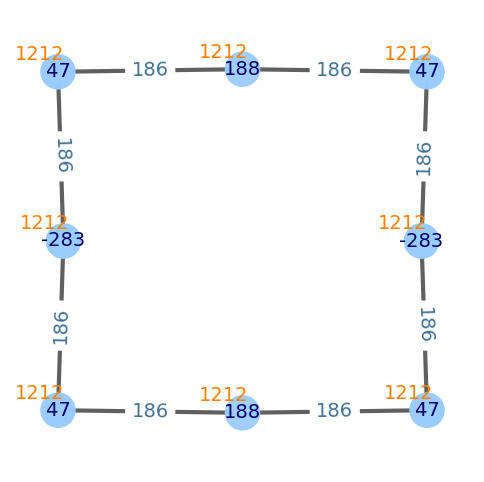

In [25]:
G.draw_graph()

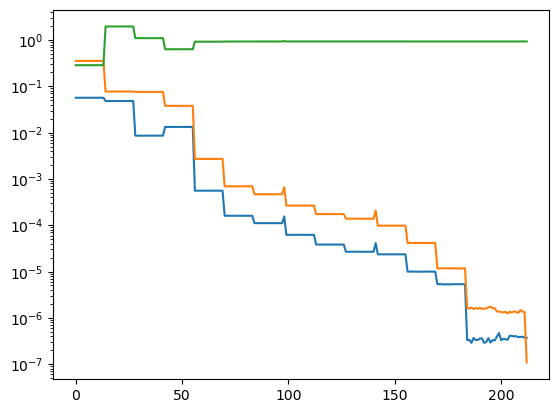

In [18]:
ct = rep.a(report, "Equalization_Log", "cost_func_by_terms")
plt.plot(ct, '-')
plt.yscale('log')


In [23]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=1)
A, U, V = G.singleband_Hubbard(u=True, offset=True)
links = G.xylinks()
def func(x): return 0.8 * np.min(x)
txTarget, tyTarget = G.t_target(G.nn_tunneling(A), links, func)
G.sf = np.min(np.array([txTarget, tyTarget]))
Utarget = np.max(U)
print(txTarget, tyTarget, Utarget)



Equalize: 1-th equalization trap depths: [1.0002683  0.99999561 0.99999561]
Equalize: 1-th equalization waists:
[[1. 1.]
 [1. 1.]
 [1. 1.]]
Equalize: 1-th equalization trap centers:
[[-1. -1.]
 [-1.  0.]
 [ 0. -1.]]
lattice: Full lattice sizes updated to: [3 3 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4.55 7.2 ]w is set.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.12s.
H_solver: eigenstates memory usage:  1.23 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[ 1 -1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.99s.
H_solver: eigenstates memory usage:  1.19 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Ti

In [24]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=0)
G.verbosity = 0
E, W, p = G.eigen_basis()
G.singleband_Hubbard(u=True, offset=True)
cv = np.sqrt(G.v_cost_func(G.A, None, G.sf))
ct = np.sqrt(G.t_cost_func(G.A, links, (txTarget, tyTarget), G.sf))
cu = np.sqrt(G.u_cost_func(G.U, Utarget, G.sf))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
cvec = np.array((cu, ct, cv))**2
c = np.array([True, True, False]) @ cvec
fval = np.sqrt(c)
print(f'fval = {fval}')
print(f'E = {E}')
print(f'parity = {p}')



Equalize: -1-th equalization trap depths: [0.98963971 0.99121403 0.9838604 ]
Equalize: -1-th equalization waists:
[[1.00018718 1.00579486]
 [1.04289335 0.97812136]
 [0.98841198 1.01841118]]
Equalize: -1-th equalization trap centers:
[[-1.02307267 -1.0195717 ]
 [-0.96655441  0.        ]
 [ 0.         -1.01147086]]
lattice: Full lattice sizes updated to: [3 3 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4.55 7.2 ]w is set.
V = [ 0.04723558 -0.28276906  0.04723559  0.18829789  0.18829788  0.0472356
 -0.28276905  0.04723556]
t = [0.18601401 0.186014   0.18601429 0.18601429 0.18601429 0.18601399
 0.18601429 0.18601402]
U = [1.21158116 1.211581   1.21158116 1.21158104 1.21158103 1.21158116
 1.211581   1.21158115]
V_err = 0.9306608256156799
t_err = 1.3113255061182327e-06
U_err = 3.724021599335045e-07
fval = 1.3631793542008252e-06
E = [array([-0.68095009, -0.68043334, -0.67520008, -0.67245568, -0.67161862,
       -0.66854485, -0.66477248, -0.66392827])]
parity 

## 3x3 Lieb rectangular

### 3x3 Lieb no waist UT

Lieb lattice size adjust to: [3 3]
Equalize: scale_factor is not a number. Set to None.
0.00018064760147118452


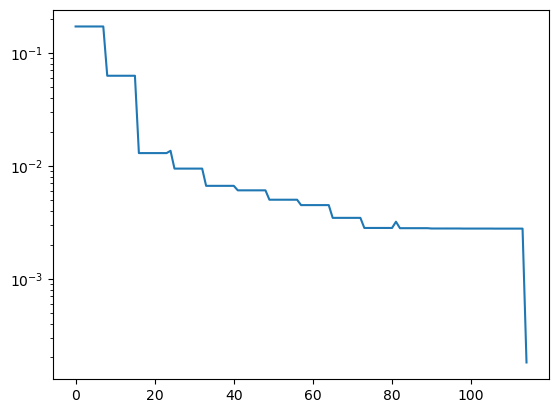

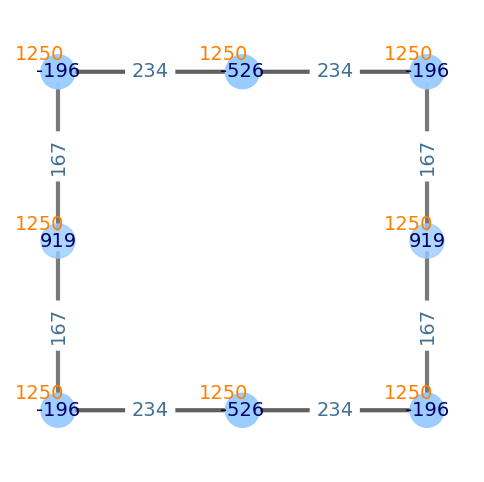

In [2]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'Lieb'
w = None
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1600),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")
G.Voff, G.trap_centers, G.waists,  G.sf = read_trap(report)

plt.plot(c, '-')
plt.yscale('log')
G.draw_graph(A=G.A, U=G.U)
print(c[-1])

Final jump shows that even if $t$ is equalized, but might not be centered around the target value. So the nonzero cost func is because target is not set to be reasonable?

Same reason for rectangular UT?

### 3x3 Lieb no waist Uv

Lieb lattice size adjust to: [3 3]
Equalize: scale_factor is not a number. Set to None.
0.02691153037943334


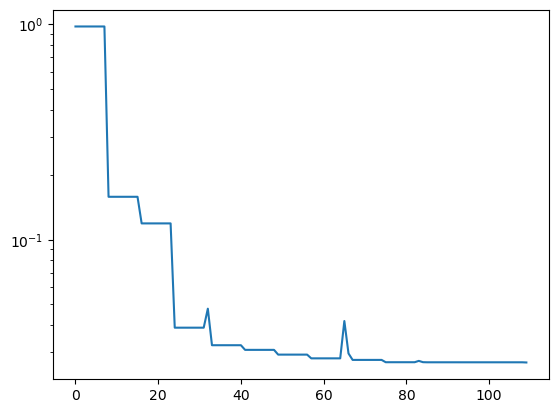

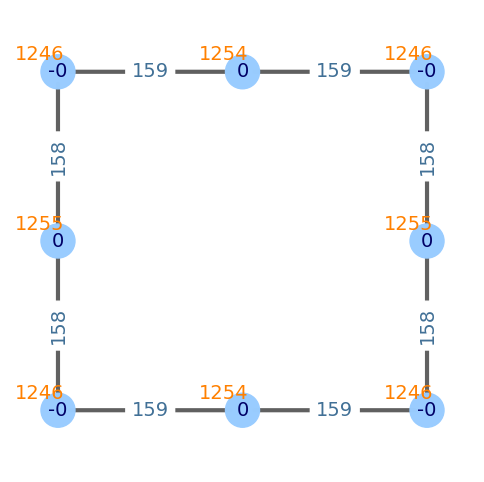

In [3]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'Lieb'
w = None
eqt = 'Uv'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1600),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")
G.Voff, G.trap_centers, G.waists,  G.sf = read_trap(report)

plt.plot(c, '-')
plt.yscale('log')
G.draw_graph(A=G.A, U=G.U)
print(c[-1])

UV is not able to simultaneously equalized, as they are contradicting to each other. 1D chain is able to equalize, because it is dimerized.

The spike is not the reason of not equalization.

### 3x3 rectangle no waist Uv

Equalize: scale_factor is not a number. Set to None.


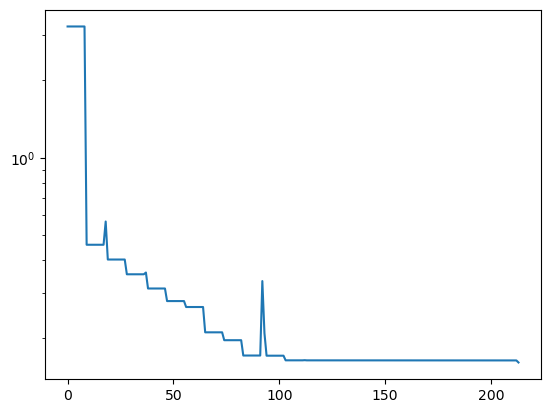

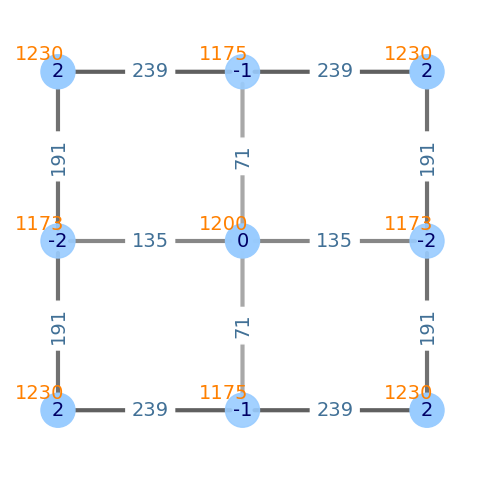

In [9]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'square'
w = None
eqt = 'Uv'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1600),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")
G.Voff, G.trap_centers, G.waists,  G.sf = read_trap(report)

plt.plot(c, '-')
plt.yscale('log')
G.draw_graph(A=G.A, U=G.U)


In [ ]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=1)
A, U, V = G.singleband_Hubbard(u=True, offset=True)
links = G.xylinks()
def func(x): return 0.8 * np.min(x)
txTarget, tyTarget = G.t_target(G.nn_tunneling(A), links, func)
G.sf = np.min(np.array([txTarget, tyTarget]))
Utarget = np.max(U)
print(txTarget, tyTarget, Utarget)



Equalize: 1-th equalization trap depths: [1.03316382 1.01617401 1.01617401 0.9994636 ]
Equalize: 1-th equalization trap centers:
[[-1. -1.]
 [-1.  0.]
 [ 0. -1.]
 [ 0.  0.]]
lattice: Full lattice sizes updated to: [3 3 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4.55 7.2 ]w is set.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 9 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 3.32s.
H_solver: eigenstates memory usage:  1.39 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[ 1 -1  1] Gaussian sparse diagonalization starts. Lowest 9 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.61s.
H_solver: eigenstates memory usage:  1.34 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 9 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.85s.
H_solver: eigenstates mem


Equalize: 66-th equalization trap depths: [1.03272936 1.01996132 1.01922891 1.0156661 ]
Equalize: 66-th equalization trap centers:
[[-1.01806691 -1.02140033]
 [-1.05356815  0.        ]
 [ 0.         -1.05845663]
 [ 0.          0.        ]]
lattice: Full lattice sizes updated to: [3 3 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4.55 7.2 ]w is set.
V = [ 0.01746913 -0.01632041  0.01746913 -0.00361898 -0.02999775 -0.00361897
  0.01746914 -0.01632042  0.01746913]
t = [0.17698419 0.17698419 0.18346598 0.13097458 0.12444147 0.18346598
 0.12444147 0.18346598 0.13097458 0.17698419 0.18346598 0.17698419]
U = [1.26634609 1.19198666 1.26634609 1.18990742 1.1538009  1.18990742
 1.26634609 1.19198666 1.26634609]
V_err = 0.09579826879253
t_err = 0.2389307906220482
U_err = 0.2440634673512038
fval = 0.3415477987087154
E = [array([-0.71797696, -0.7143474 , -0.71431335, -0.70973744, -0.70940977,
       -0.70939991, -0.7047052 , -0.70440327, -0.70102835])]
parity = [arra

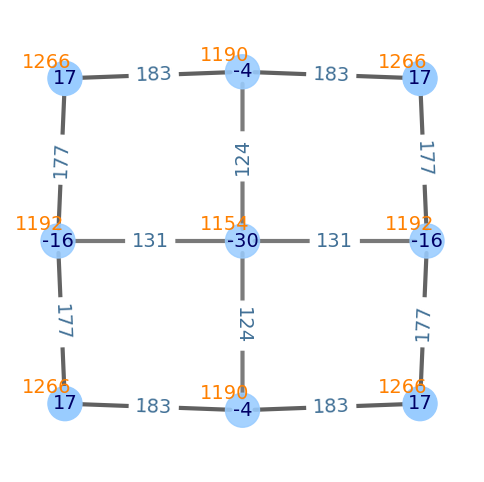

In [ ]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=66)
G.verbosity = 0
E, W, p = G.eigen_basis()
G.singleband_Hubbard(u=True, offset=True)
cv = np.sqrt(G.v_cost_func(G.A, None, G.sf))
ct = np.sqrt(G.t_cost_func(G.A, links, (txTarget, tyTarget), G.sf))
cu = np.sqrt(G.u_cost_func(G.U, Utarget, G.sf))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
cvec = np.array((cu, ct, cv))**2
c = np.array([True, True, False]) @ cvec
fval = np.sqrt(c)
print(f'fval = {fval}')
print(f'E = {E}')
print(f'parity = {p}')
G.draw_graph(A=G.A, U=G.U)

The issue is due to Riemann manifold optimization. Random initial parameters might cause the optimization to fail.

### 3x3 rectangle no waist UvT

Set a larger spacing to get initial parameters.

Equalize: scale_factor is not a number. Set to None.


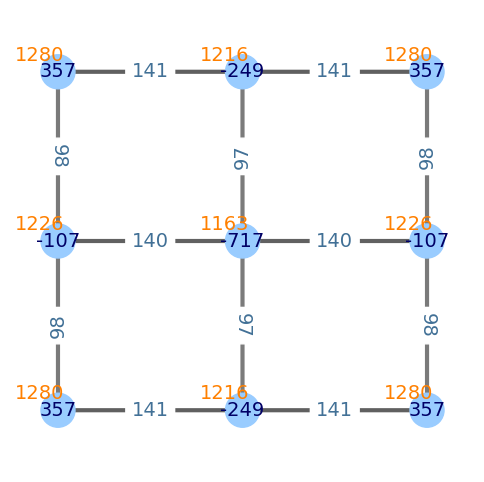

In [1]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'square'
w = None
eqt = 'UvT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1600),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
G.trap_centers *= 1.05
G.draw_graph()

Equalize: scale_factor is not a number. Set to None.


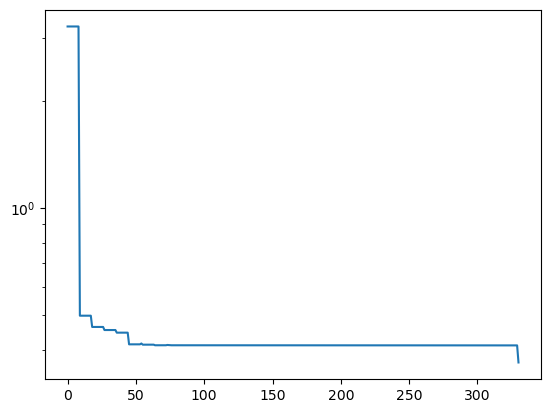

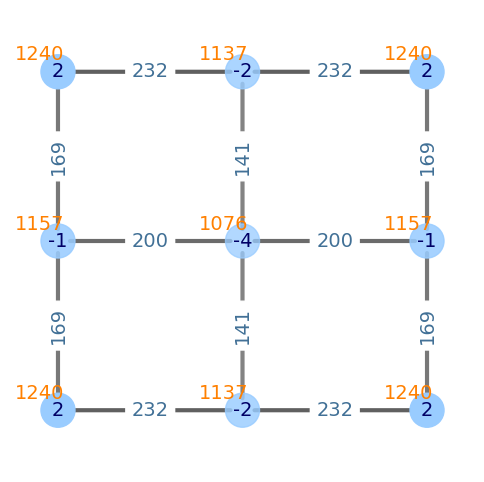

In [10]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'square'
w = None
eqt = 'UvT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1550),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")
G.Voff, G.trap_centers, G.waists,  G.sf = read_trap(report)

plt.plot(c, '-')
plt.yscale('log')
G.draw_graph(A=G.A, U=G.U)


### 3x3 rectangle no waist Uv

Equalize: scale_factor is not a number. Set to None.
2.181539567988712e-06


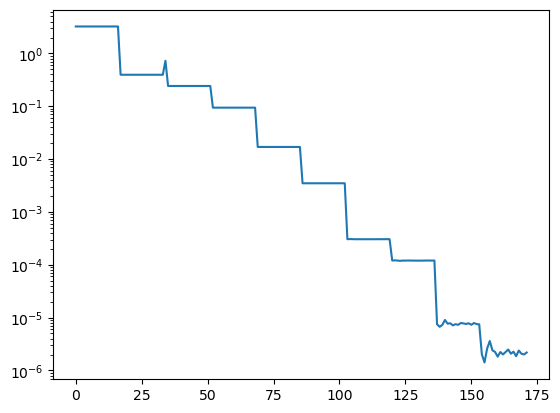

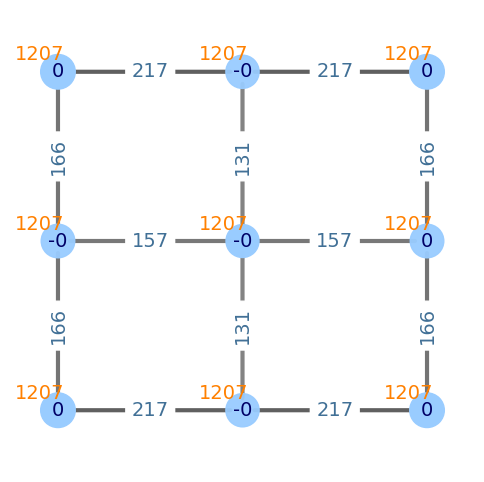

In [12]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'square'
w = 'xy'
eqt = 'Uv'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1600),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")
G.Voff, G.trap_centers, G.waists,  G.sf = read_trap(report)

plt.plot(c, '-')
plt.yscale('log')
G.draw_graph(A=G.A, U=G.U)
print(c[-1])


### 3x3 Lieb no waist UvT

Lieb lattice size adjust to: [3 3]
Equalize: scale_factor is not a number. Set to None.
0.110709078676327


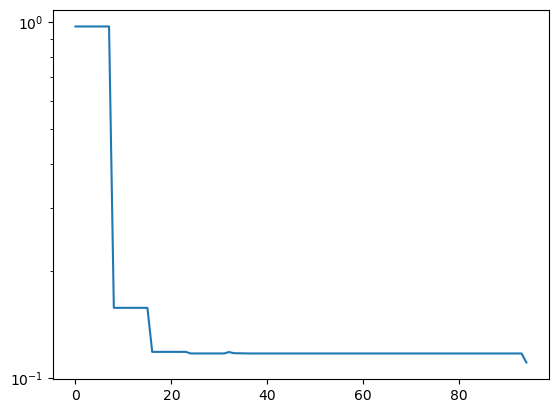

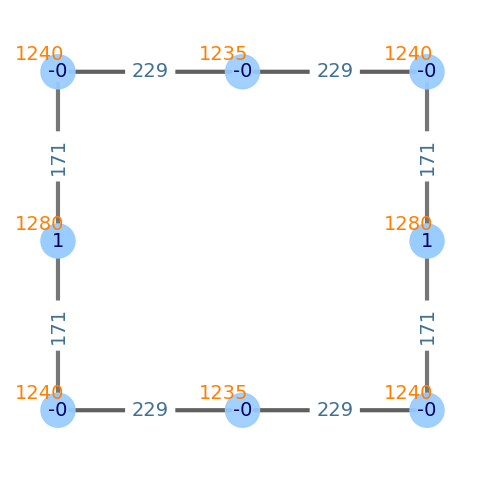

In [ ]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'Lieb'
w = None
eqt = 'UvT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1600),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")
G.Voff, G.trap_centers, G.waists,  G.sf = read_trap(report)

plt.plot(c, '-')
plt.yscale('log')
G.draw_graph(A=G.A, U=G.U)
print(c[-1])

### 3x3 Lieb xy UT

Lieb lattice size adjust to: [3 3]
Equalize: scale_factor is not a number. Set to None.
6.640516197055468e-07


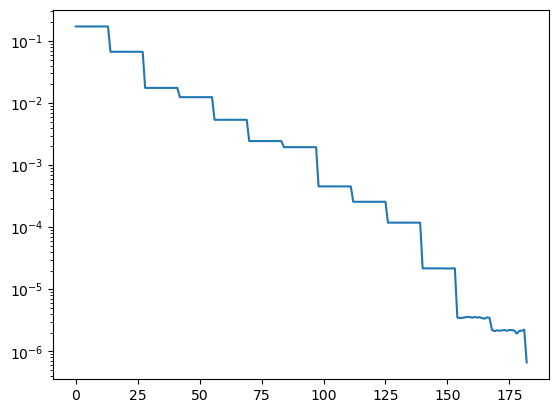

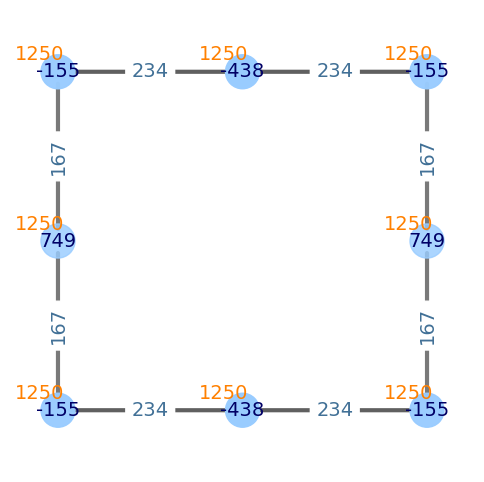

In [ ]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'Lieb'
w = 'xy'
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1600),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")
G.Voff, G.trap_centers, G.waists,  G.sf = read_trap(report)

plt.plot(c, '-')
plt.yscale('log')
G.draw_graph(A=G.A, U=G.U)
print(c[-1])

## 3x3 rectangle

### 3x3 rectangle no waist UT

Equalize: scale_factor is not a number. Set to None.


array([[-1.01643044, -1.01218288],
       [-1.00830568, -0.        ],
       [-1.01643044,  1.01218288],
       [-0.        , -1.00605207],
       [-0.        , -0.        ],
       [-0.        ,  1.00605207],
       [ 1.01643044, -1.01218288],
       [ 1.00830568, -0.        ],
       [ 1.01643044,  1.01218288]])

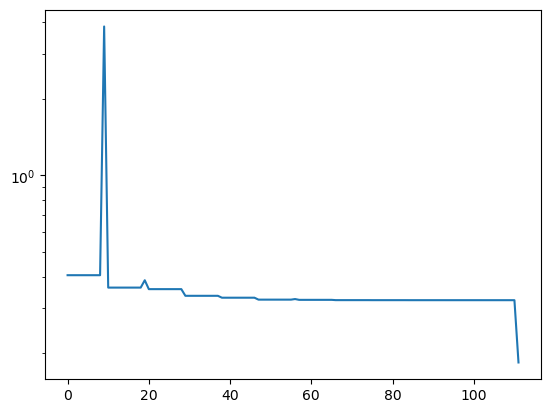

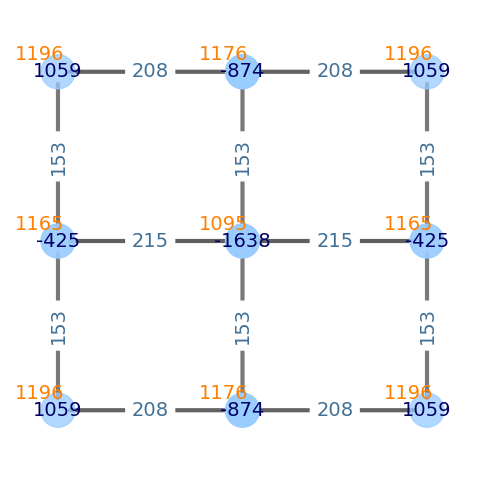

In [ ]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'square'
w = None
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1600),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")
G.Voff, G.trap_centers, G.waists,  G.sf = read_trap(report)

plt.plot(c, '-')
plt.yscale('log')
G.draw_graph(A=G.A, U=G.U)
G.trap_centers


In [ ]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=1)
A, U, V = G.singleband_Hubbard(u=True, offset=True)
links = G.xylinks()
def func(x): return 0.8 * np.min(x)
txTarget, tyTarget = G.t_target(G.nn_tunneling(A), links, func)
G.sf = np.min(np.array([txTarget, tyTarget]))
Utarget = np.max(U)
print(txTarget, tyTarget, Utarget)



Equalize: 1-th equalization trap depths: [1. 1. 1. 1.]
Equalize: 1-th equalization trap centers:
[[-1.05 -1.05]
 [-1.05  0.  ]
 [ 0.   -1.05]
 [ 0.    0.  ]]
lattice: Full lattice sizes updated to: [3 3 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4.6  7.2 ]w is set.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 9 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.02s.
H_solver: eigenstates memory usage:  1.39 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[ 1 -1  1] Gaussian sparse diagonalization starts. Lowest 9 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.90s.
H_solver: eigenstates memory usage:  1.34 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 9 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.35s.
H_solver: eigenstates memory usage:  1.34


Equalize: 112-th equalization trap depths: [0.99731265 1.01065847 1.02097789 1.02686648]
Equalize: 112-th equalization trap centers:
[[-1.05523531 -1.0563663 ]
 [-1.06201025  0.        ]
 [ 0.         -1.0682834 ]
 [ 0.          0.        ]]
lattice: Full lattice sizes updated to: [3 3 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4.6  7.2 ]w is set.
V = [ 0.77453457 -0.17203379  0.77453457 -0.71898143 -1.31610786 -0.71898141
  0.77453458 -0.17203379  0.77453456]
t = [0.09115395 0.09115395 0.13323521 0.12048202 0.07574033 0.13323522
 0.07574033 0.13323514 0.12048202 0.09115395 0.13323524 0.09115396]
U = [1.27876623 1.25287836 1.27876623 1.26157553 1.22529706 1.26157553
 1.27876623 1.25287836 1.27876623]
V_err = 9.816669691736221
t_err = 0.27044572405695294
U_err = 0.30523089787487095
fval = 0.4078072960090212
E = [array([-0.70984143, -0.69805206, -0.69763889, -0.68750927, -0.68689752,
       -0.66912123, -0.66871508, -0.66850955, -0.66811029])]
parity = 

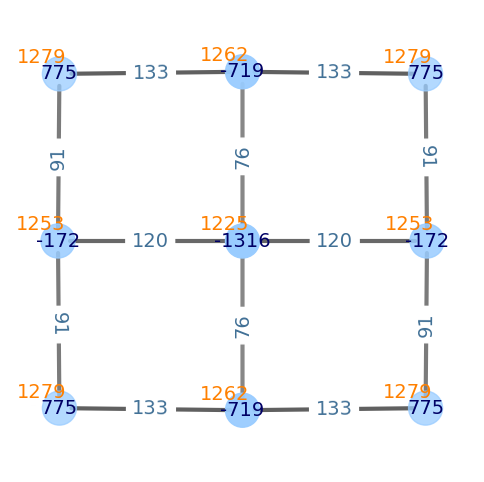

In [ ]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=112)
G.verbosity = 0
E, W, p = G.eigen_basis()
G.singleband_Hubbard(u=True, offset=True)
cv = np.sqrt(G.v_cost_func(G.A, None, G.sf))
ct = np.sqrt(G.t_cost_func(G.A, links, (txTarget, tyTarget), G.sf))
cu = np.sqrt(G.u_cost_func(G.U, Utarget, G.sf))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
cvec = np.array((cu, ct, cv))**2
c = np.array([True, True, False]) @ cvec
fval = np.sqrt(c)
print(f'fval = {fval}')
print(f'E = {E}')
print(f'parity = {p}')
G.draw_graph(A=G.A, U=G.U)

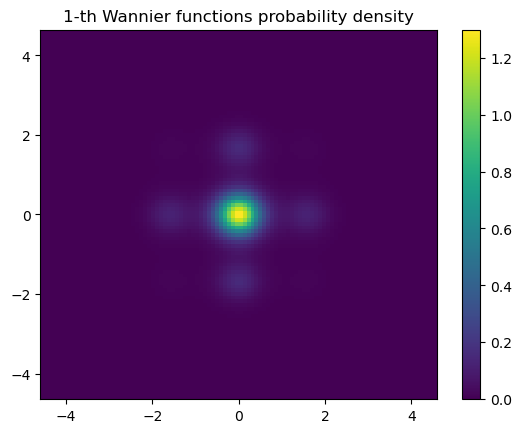

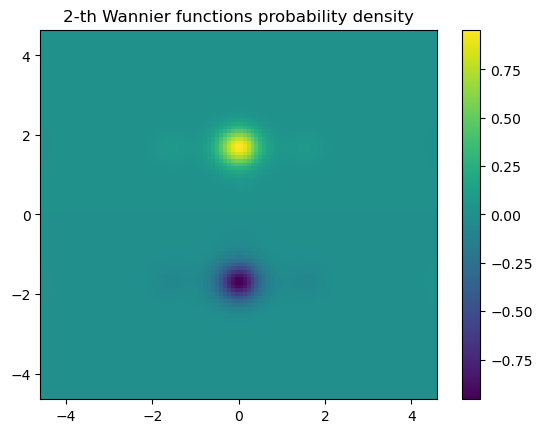

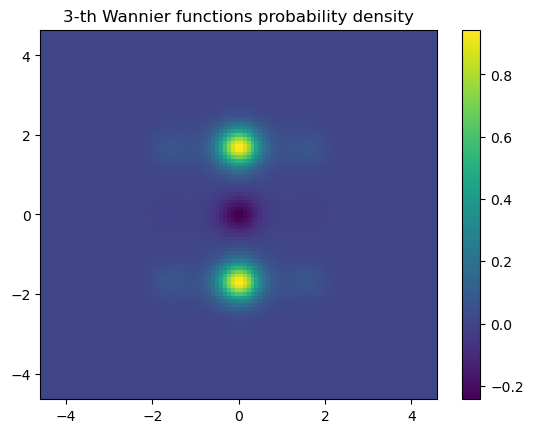

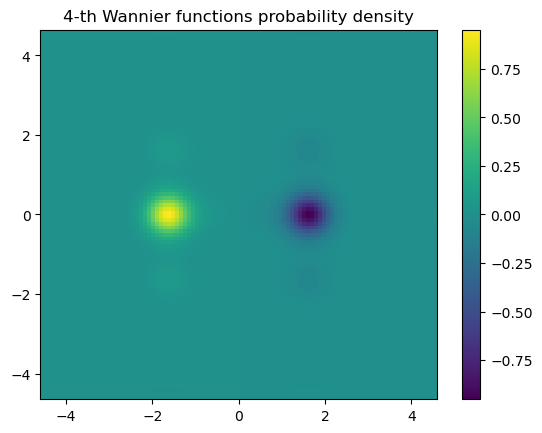

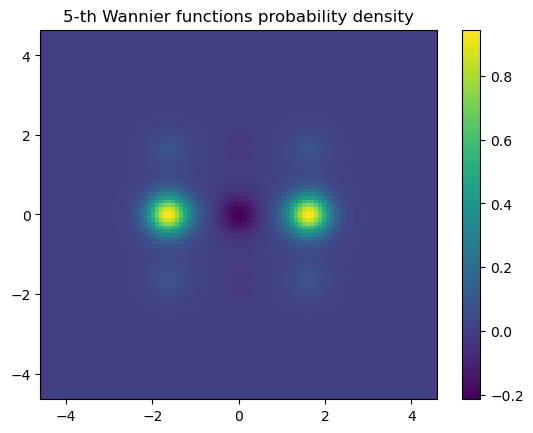

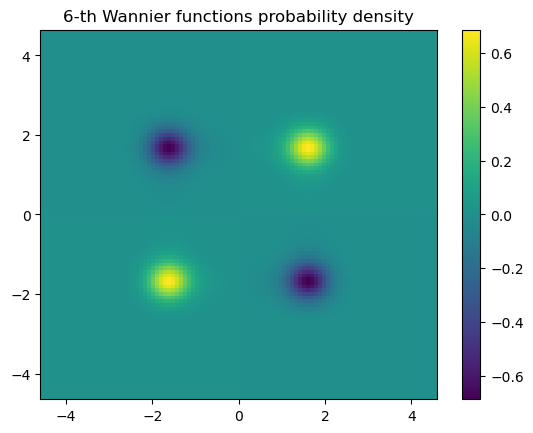

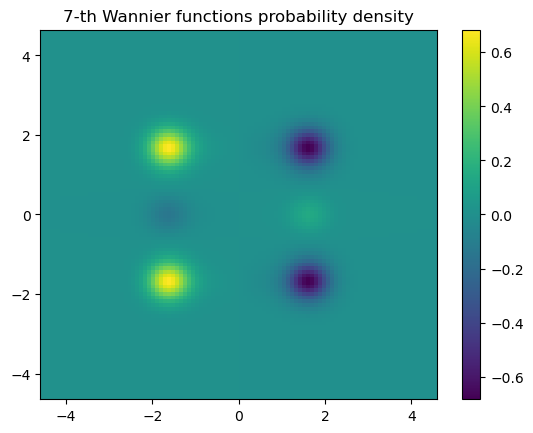

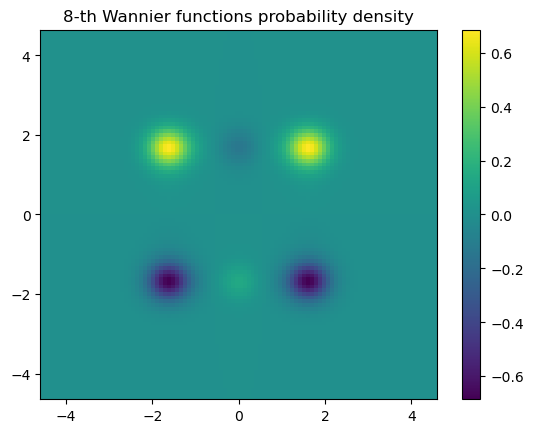

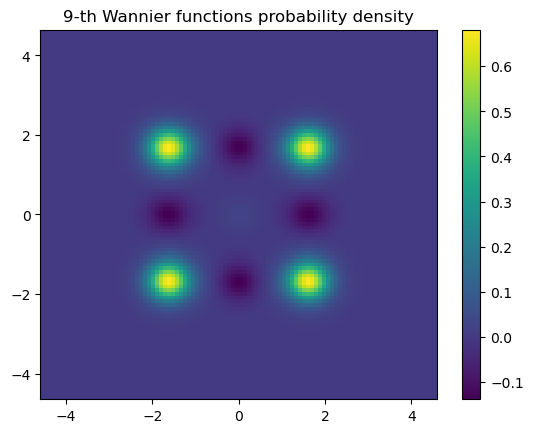

In [ ]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-G.R0[0], G.R0[0], 100)
y = np.linspace(-G.R0[1], G.R0[1], 100)
z = np.array([0])
X = np.meshgrid(x, y, indexing='ij')

for i in range(G.Nsite):
    Wx = fix_phase(
        psi((x, y, z), G.n, G.dx, W[0][i], p[0][i])[..., 0, 0], mode='svmd')
    plt.figure()
    plt.pcolormesh(*X, Wx)
    plt.colorbar()
    plt.title(f'{i+1}-th Wannier functions probability density')


### 3x3 rectangle xy UT

Equalize: scale_factor is not a number. Set to None.


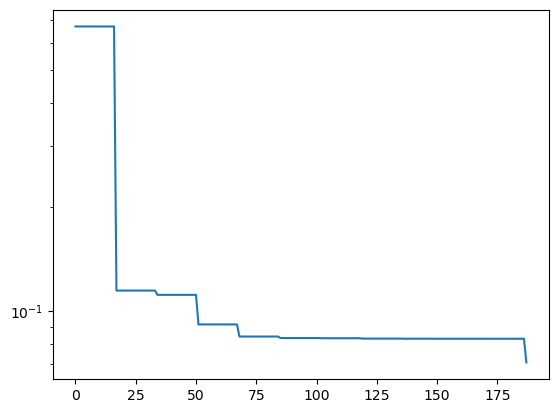

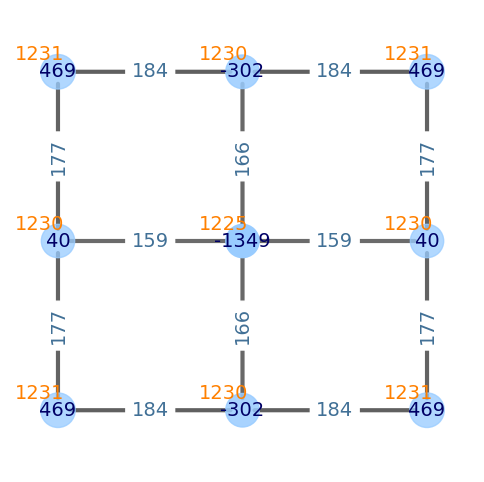

In [ ]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'square'
w = 'xy'
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1600),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/Convergence analysis/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")
G.Voff, G.trap_centers, G.waists,  G.sf = read_trap(report)

plt.plot(c, '-')
plt.yscale('log')
G.draw_graph(A=G.A, U=G.U)


### 3x3 rectangle xy UvT

Equalize: scale_factor is not a number. Set to None.
0.050791328202319075


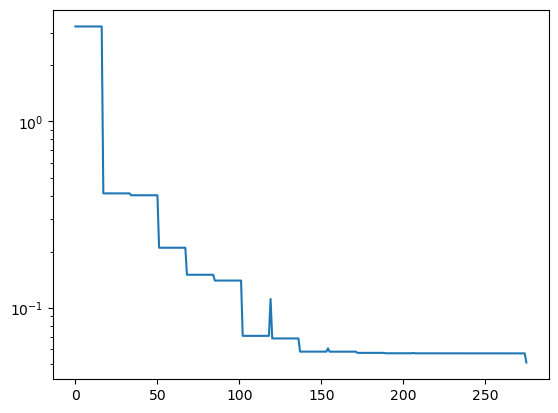

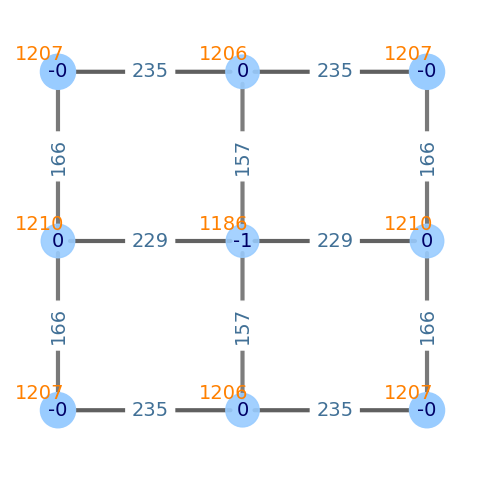

In [11]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'square'
w = 'xy'
eqt = 'UvT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1600),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")
G.Voff, G.trap_centers, G.waists,  G.sf = read_trap(report)

plt.plot(c, '-')
plt.yscale('log')
G.draw_graph(A=G.A, U=G.U)
print(c[-1])